# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `6` | `Questions`

> Hi, Team. 👋

> I hope you are having a restful recess week. The purpose of the current exercise problem sets is to consolidate and expand the understanding of algorithmic trading tool kits that you have developed in the course.

> Building on what you have learned thus far, these problem sets will ask you to create trading strategies, capitalizing on commonly used technical indicators.

> Please submit your answers via the submission portal at eLearn. Again, it would be a good practice to attempt to answer these questions within the designated time limit.

> As with the previous exercise problem sets, the questions are written in such a way that helps advance your learning, rather than testing you.

> Enjoy!"🤞

### For standardization of your answers…

> Please execute the lines of code below before you start work on your answers.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf


> Let's set some print option.

In [2]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

## 👇 Questions 1 to 4 ask you to build, execute, and backtest a strategy based on one kind of momentum strategy called the `Moving Average Convergence Divergence` (MACD) crossover.

### <font color = blue> 👉 Question 1</font>. Let’s take a look at Apple (AAPL) as our security of interest, over the three-year period of 2015 through 2017.

In [3]:
def obtain(stocks, start, end):
    def data(ticker):
        return(pdr.get_data_yahoo(ticker, 
                                  start = start,
                                  end = end)
              )
    
    stock_data = map(data, stocks)
    return(pd.concat(stock_data,
                     names = ["Date"]
                    )
           )

In [4]:
stocks = [ "AAPL", ]

In [5]:
data = obtain(stocks,
                  dt.datetime(2014, 11, 3),
                  dt.datetime(2017, 12, 31)
                  )
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-11-03,27.575001,27.002501,27.055000,27.350000,209130400.0,24.553326
2014-11-04,27.372499,26.930000,27.340000,27.150000,166297600.0,24.373781
2014-11-05,27.325001,27.032499,27.275000,27.215000,149743600.0,24.432137
2014-11-06,27.197500,26.950001,27.150000,27.174999,139874000.0,24.502005
2014-11-07,27.330000,27.137501,27.187500,27.252501,134766000.0,24.571894
...,...,...,...,...,...,...
2017-12-22,43.855000,43.625000,43.669998,43.752499,65397600.0,41.673244
2017-12-26,42.867500,42.419998,42.700001,42.642502,132742000.0,40.616005
2017-12-27,42.695000,42.427502,42.525002,42.650002,85992800.0,40.623150


#### Moving Average Convergence Divergence (`MACD`) is a lagging, trend-following momentum indicator reflecting the relationship between two moving averages of stock prices.

#### The strategy utilizes two indicators, the MACD and the MACD signal line:

- The MACD is defined as the `difference` between the `12`-day ***exponential*** moving average and the `26`-day exponential moving average.
- The MACD signal line is then defined as the `9`-day ***exponential*** moving average of the MACD.

### <font color = green> NOTE: The MACD crossover strategy is defined as:

- A `bullish` crossover arises when the MACD line turns `upward and crosses` beyond the MACD signal line.
- A `bearish` crossover arises when the MACD line turns `downward and crosses` under the MACD signal line.

### Visualize your buy and sell positions.

### Below are the lines of code that lead to an answer:

In [6]:
short_window = 12
long_window = 26
signal_window = 9

data["EWMA_short"] = data[["Adj Close"]].ewm(span = short_window).mean()
data["EWMA_long"] = data[["Adj Close"]].ewm(span = long_window).mean()
data["MACD"] = data["EWMA_short"] - data["EWMA_long"]
data["MACD_signal"] = data[["MACD"]].ewm(span = signal_window).mean()
data["MACD_hist"] = data["MACD"] - data["MACD_signal"]
data["positions"] = data["MACD_hist"].apply(lambda x :1 if x>0 else 0)
data["buy_sell_positions"] = data["positions"].diff()
data = data.loc['2015-01-02':,:]
data

,High,Low,Open,Close,Volume,Adj Close,EWMA_short,EWMA_long,MACD,MACD_signal,MACD_hist,positions,buy_sell_positions
Date,,,,,,,,,,,,,
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.644022,25.186266,25.307042,-0.120775,-0.099384,-0.021391,0,-1.0
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,23.949755,24.995889,25.202689,-0.206800,-0.120869,-0.085931,0,0.0
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,23.952007,24.835189,25.106801,-0.271613,-0.151019,-0.120594,0,0.0
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.287872,24.750940,25.044178,-0.293238,-0.179464,-0.113774,0,0.0
2015-01-08,28.037500,27.174999,27.307501,27.972500,237458000.0,25.221071,24.823301,25.057673,-0.234371,-0.190446,-0.043925,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,43.855000,43.625000,43.669998,43.752499,65397600.0,41.673244,41.331341,40.950048,0.381292,0.350703,0.030590,1,0.0
2017-12-26,42.867500,42.419998,42.700001,42.642502,132742000.0,40.616005,41.221289,40.925304,0.295985,0.339759,-0.043775,0,-1.0
2017-12-27,42.695000,42.427502,42.525002,42.650002,85992800.0,40.623150,41.129268,40.902923,0.226345,0.317076,-0.090731,0,0.0


In [7]:
#diff()?

In [8]:
def plot_chart(data, ):
    fig = plt.figure()  
    fig.set_size_inches((20, 16))
    ax_close = fig.add_axes((0, 0.72, 1, 0.32))   
    ax_position = fig.add_axes((0, 0.48, 1, 0.2), sharex=ax_close)
    ax_macd = fig.add_axes((0, 0.24, 1, 0.2), sharex=ax_close)  
    ax_vol = fig.add_axes((0, 0, 1, 0.2), sharex=ax_close)   
    #close
    ax_close.plot(data.index, data["Adj Close"], label="Adj Close")

    # Selling
    ax_close.plot(data.loc[data.buy_sell_positions == -1.0].index,
             data['Adj Close'][data.buy_sell_positions == -1.0],
             "v",
             markersize = 12,
             color = "green",
            label = 'Selling')

    # Buying
    ax_close.plot(data.loc[data.buy_sell_positions == 1.0].index,
             data['Adj Close'][data.buy_sell_positions == 1.0],
             "^",
             markersize = 12,
             color = "red",
            label = 'Buying')
    
    ax_close.set_title('Adj Close')
    ax_close.legend()
    #buy and sell position
    ax_position.plot(data.index, data["buy_sell_positions"], label="buy_sell_positions")
    ax_position.set_title('Positions')
    ax_position.legend()
    #MACD
    ax_macd.plot(data.index, data["MACD"], label="MACD")
    ax_macd.bar(data.index, data["MACD_hist"] * 3, label="hist")
    ax_macd.plot(data.index, data["MACD_signal"], label="signal")
    ax_macd.set_title('MACD')
    ax_macd.legend()
    #Volume
    ax_vol.bar(data.index, data["Volume"] / 1000000,)
    ax_vol.set_ylabel("Volume(million)")
    ax_vol.set_title('Volume')
 
    plt.show()



### <font color = red> Answer 1 is presented in the cell below: </font>

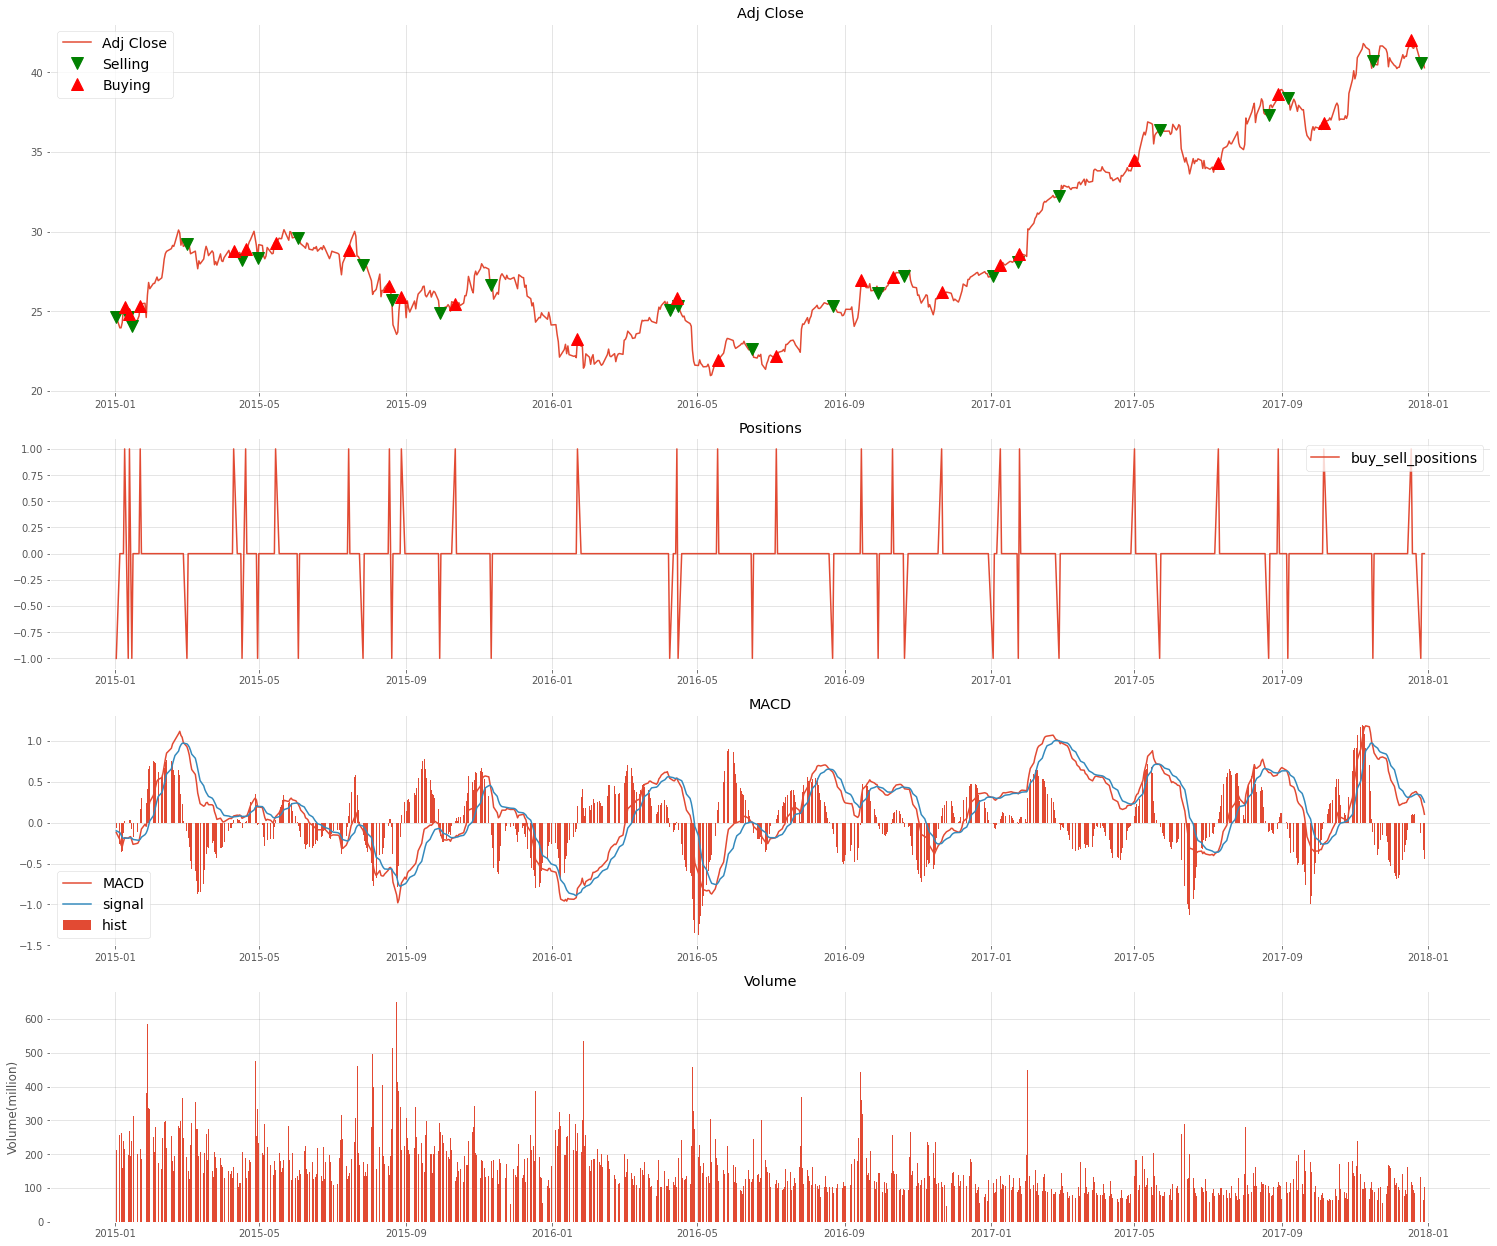

In [9]:
plot_chart(data,)

### <font color = blue> 👉 Question 2</font>. Let’s suppose that you started from a $100,000 capital base for the given security.

### Given a $5 fixed commission fee per trade, how much in cumulative returns could you have had as a result of the MACD crossover strategy?

### Below are the lines of code that lead to an answer:

In [10]:
our_capital_list = []
our_capital = 100000.0
cash_list = []
cash = 100000.0
volume_list = []
volume = 0
fee = 5.0
our_position = pd.DataFrame(index = data.index).fillna(0.0)

for Date in data.index:
    if data.loc[data.index == Date,"buy_sell_positions"][0] == 1:
        volume = (cash - fee) // data.loc[data.index == Date,"Adj Close"][0] 
        volume_list.append(volume)
        cash = cash - volume * data.loc[data.index == Date,"Adj Close"][0]  - fee
        cash_list.append(cash)
        our_capital = volume * data.loc[data.index == Date,"Adj Close"][0]  + cash
        our_capital_list.append(our_capital)
    elif data.loc[data.index == Date,"buy_sell_positions"][0] == -1:
        if  volume != 0:
            cash = cash - fee + volume * data.loc[data.index == Date,"Adj Close"][0] 
            cash_list.append(cash)
            volume = 0
            volume_list.append(volume)
            our_capital = volume * data.loc[data.index == Date,"Adj Close"][0]  + cash
            our_capital_list.append(our_capital)
        else:
            cash_list.append(cash)
            volume_list.append(volume)
            our_capital = volume * data.loc[data.index == Date,"Adj Close"][0]  + cash
            our_capital_list.append(our_capital)  
    else:
        cash_list.append(cash)
        volume_list.append(volume)
        our_capital = volume * data.loc[data.index == Date,"Adj Close"][0]  + cash
        our_capital_list.append(our_capital)
back_test = pd.concat([
    pd.DataFrame(data.index,columns = ['Date']),
    pd.DataFrame(volume_list,columns = ['stock_volume']),
    pd.DataFrame(cash_list,columns = ['cash']),
    pd.DataFrame(our_capital_list,columns = ['our_capital'])
    ],axis = 1)

In [11]:
back_test.head(40)

,Date,stock_volume,cash,our_capital
0,2015-01-02,0.0,100000.000000,100000.000000
1,2015-01-05,0.0,100000.000000,100000.000000
2,2015-01-06,0.0,100000.000000,100000.000000
3,2015-01-07,0.0,100000.000000,100000.000000
4,2015-01-08,0.0,100000.000000,100000.000000
5,2015-01-09,3960.0,12.470016,99995.000000
6,2015-01-12,0.0,97526.382523,97526.382523
7,2015-01-13,3925.0,6.212568,97521.382523
8,2015-01-14,3925.0,6.212568,97149.797869
9,2015-01-15,0.0,94508.287401,94508.287401


In [12]:
back_test['return'] = np.log(back_test['our_capital']/back_test['our_capital'].shift())
back_test['return_cumsum'] = np.exp(back_test['return'].cumsum())-1
pd.set_option('display.max_rows', 100)
back_test.iloc[0: 100, :]

,Date,stock_volume,cash,our_capital,return,return_cumsum
0,2015-01-02,0.0,100000.000000,100000.000000,NaN,NaN
1,2015-01-05,0.0,100000.000000,100000.000000,0.000000,0.000000
2,2015-01-06,0.0,100000.000000,100000.000000,0.000000,0.000000
3,2015-01-07,0.0,100000.000000,100000.000000,0.000000,0.000000
4,2015-01-08,0.0,100000.000000,100000.000000,0.000000,0.000000
5,2015-01-09,3960.0,12.470016,99995.000000,-0.000050,-0.000050
6,2015-01-12,0.0,97526.382523,97526.382523,-0.024997,-0.024736
7,2015-01-13,3925.0,6.212568,97521.382523,-0.000051,-0.024786
8,2015-01-14,3925.0,6.212568,97149.797869,-0.003818,-0.028502
9,2015-01-15,0.0,94508.287401,94508.287401,-0.027567,-0.054917


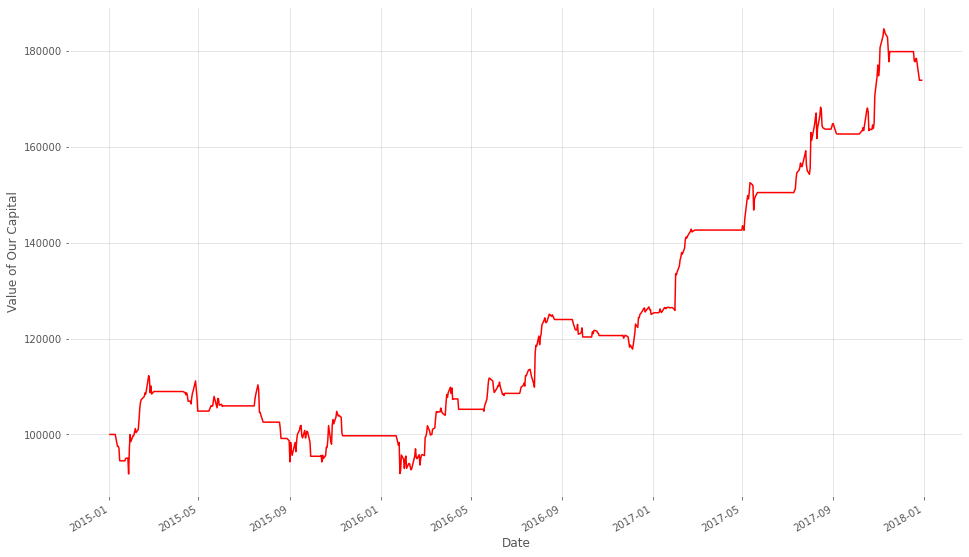

In [13]:
fig = plt.figure(figsize = (16, 10)
                 )

sub = fig.add_subplot(111,
                      ylabel = "Value of Our Capital")

back_test.set_index('Date',inplace = True)
back_test["our_capital"].plot(ax = sub, # This is our equity curve
                            color = "r")


plt.show()

### <font color = red> Answer 2 </font>

    The answer is _73.86_ % .

### <font color = blue> 👉 Question 3</font>. Now please find the `five` worst drawdown periods over the investment horizon and provide their net drawdown in % and duration, respectively.

### <font color = green> The question asks you to find the five worst drawdown periods, beyond identifying max drawdown (MDD).

### Below are the lines of code that lead to an answer:

In [14]:
back_test

,stock_volume,cash,our_capital,return,return_cumsum
Date,,,,,
2015-01-02,0.0,100000.000000,100000.000000,NaN,NaN
2015-01-05,0.0,100000.000000,100000.000000,0.000000,0.000000
2015-01-06,0.0,100000.000000,100000.000000,0.000000,0.000000
2015-01-07,0.0,100000.000000,100000.000000,0.000000,0.000000
2015-01-08,0.0,100000.000000,100000.000000,0.000000,0.000000
...,...,...,...,...,...
2017-12-22,4280.0,29.444412,178390.930771,0.000000,0.783909
2017-12-26,0.0,173860.945572,173860.945572,-0.025722,0.738609
2017-12-27,0.0,173860.945572,173860.945572,0.000000,0.738609


In [15]:
back_test['max_performance'] = back_test["return_cumsum"].cummax()
back_test['drawdown'] = back_test['max_performance'] - back_test["return_cumsum"]
back_test['max_drawdown'] = back_test['drawdown'].cummax()
back_test

,stock_volume,cash,our_capital,return,return_cumsum,max_performance,drawdown,max_drawdown
Date,,,,,,,,
2015-01-02,0.0,100000.000000,100000.000000,NaN,NaN,NaN,NaN,NaN
2015-01-05,0.0,100000.000000,100000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-01-06,0.0,100000.000000,100000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-01-07,0.0,100000.000000,100000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-01-08,0.0,100000.000000,100000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2017-12-22,4280.0,29.444412,178390.930771,0.000000,0.783909,0.845769,0.061859,0.204035
2017-12-26,0.0,173860.945572,173860.945572,-0.025722,0.738609,0.845769,0.107159,0.204035
2017-12-27,0.0,173860.945572,173860.945572,0.000000,0.738609,0.845769,0.107159,0.204035


In [16]:
def max_drawdown(df):
    
    index = df['drawdown'][df['drawdown'] == 0].index

    a = []

    for i in range(1,len(index)):
        period = index[i].to_pydatetime() - index[i-1].to_pydatetime()
        max_drawdown = df.loc[index[i-1]:index[i],'drawdown'].max()
        a.append([period,max_drawdown,index[i-1],index[i]])
    
    df1 = pd.DataFrame(a,columns=['period','max_drawdown','begin','end']).sort_values('max_drawdown',ascending=False)

    return df1

In [17]:
max_drawdown(back_test).head(5)

,period,max_drawdown,begin,end
13,507 days,0.204035,2015-02-23,2016-07-14
3,27 days,0.082369,2015-01-08,2015-02-04
25,123 days,0.072918,2016-08-15,2016-12-16
48,62 days,0.057142,2017-05-12,2017-07-13
61,73 days,0.055941,2017-08-15,2017-10-27


### <font color = red> Answer 3 </font>

    The Worst drawdown period     : Net drawdown ____________ % | Duration ____________ Days
    
    The 2nd worst drawdown period : Net drawdown ____________ % | Duration ____________ Days
     
    The 3rd worst drawdown period : Net drawdown ____________ % | Duration ____________ Days
         
    The 4th worst drawdown period : Net drawdown ____________ % | Duration ____________ Days
    
    The 5th worst drawdown period : Net drawdown ____________ % | Duration ____________ Days

### <font color = blue> 👉 Question 4</font>. Within the investment horizon, please calculate annual returns for each of the three years and then find the year that performs better than average vs. less than average annual returns.

In [18]:
back_test["return"]

Date
2015-01-02         NaN
2015-01-05    0.000000
2015-01-06    0.000000
2015-01-07    0.000000
2015-01-08    0.000000
                ...   
2017-12-22    0.000000
2017-12-26   -0.025722
2017-12-27    0.000000
2017-12-28    0.000000
2017-12-29    0.000000
Name: return, Length: 755, dtype: float64

### Below are the lines of code that lead to an answer:

In [19]:
np.exp(back_test["return"].groupby(back_test.index.year).sum())-1

Date
2015   -0.002744
2016    0.253800
2017    0.390488
Name: return, dtype: float64

In [20]:
Annual_mean = (np.exp(back_test["return"].groupby(back_test.index.year).sum())-1).mean()
Annual_mean

0.2138479122951857

In [21]:

Annual_return = np.exp(back_test["return"].groupby(back_test.index.year).sum())-1
Annual_return>Annual_mean

Date
2015    False
2016     True
2017     True
Name: return, dtype: bool

### <font color = red> Answer 4 </font>

    Below average year(s) : 2015 
    
    Above average year(s) : 2016、2017 
     

###  <font color = blue> 👉 Question 5. </font> What's the annualized Sharpe ratio of the current investment strategy?

### Below are the lines of code that lead to an answer:

In [22]:
Annualized_Sharpe_ratio = (np.exp(back_test["return"])-1).mean()/(np.exp(back_test["return"])-1).std()*(252**0.5)
Annualized_Sharpe_ratio

1.2373061863641244

### <font color = red> Answer 5 </font>
    
    Sharpe ratio: 1.237
    

## 👇 Questions 6 to 10 ask you to answer the above questions using your `customized functions` to `scale up`.

### Below you will find the above questions repeated, but this time you need to compare the results across the following six stocks:

### `MSFT`

### `AMZN`

### `UAL`

### `DAL`

### `XOM`

### `CVX`

### <font color = green> NOTE: When answering the questions below, please hold all the conditions (i.e., investment horizon; capital base; deployment of `MACD crossover strategy`; the flat commission fee, etc.) constant, as you did above. 
    
### <font color = green> That is, the `investment horizon` will be three years between 2015 and 2017; your `capital` is USD 100,000; and there is a USD 5 flat `commission fee` per trade. Given the iterative nature of the questions below, writing and using your customized functions will be helpful as you answer the questions.

###  <font color = blue> 👉 Question 6. </font>  Please visualize buy and sell positions for each of the six stocks. 

### Below are the lines of code that lead to an answer:

### <font color = red> Answer 6 is presented in the cell below: </font>

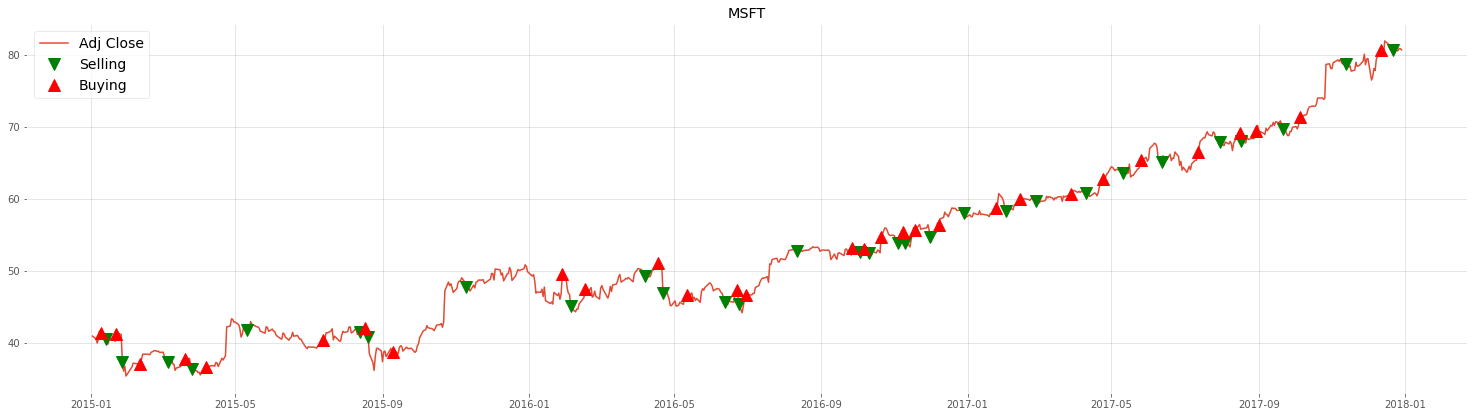

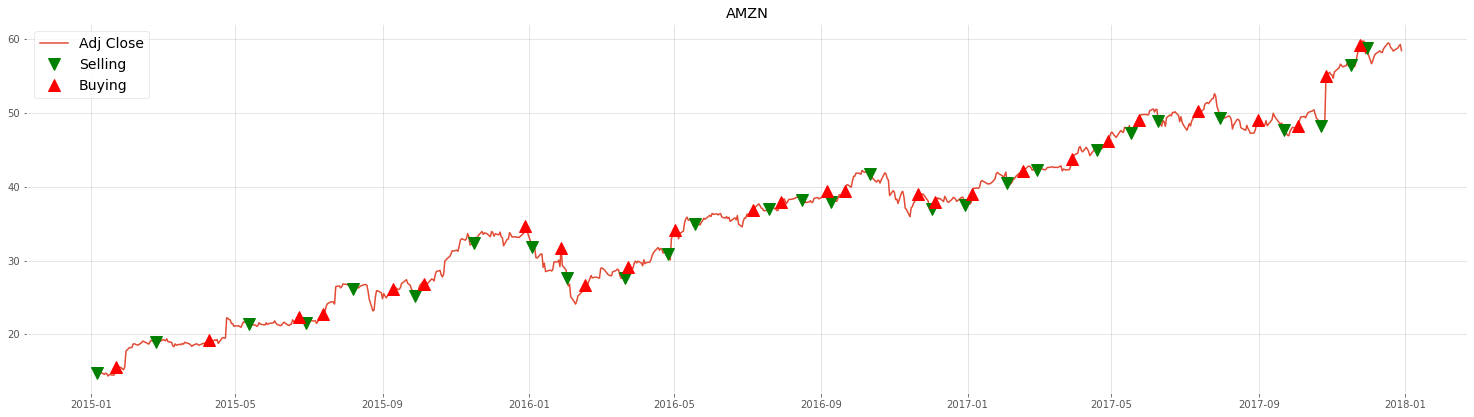

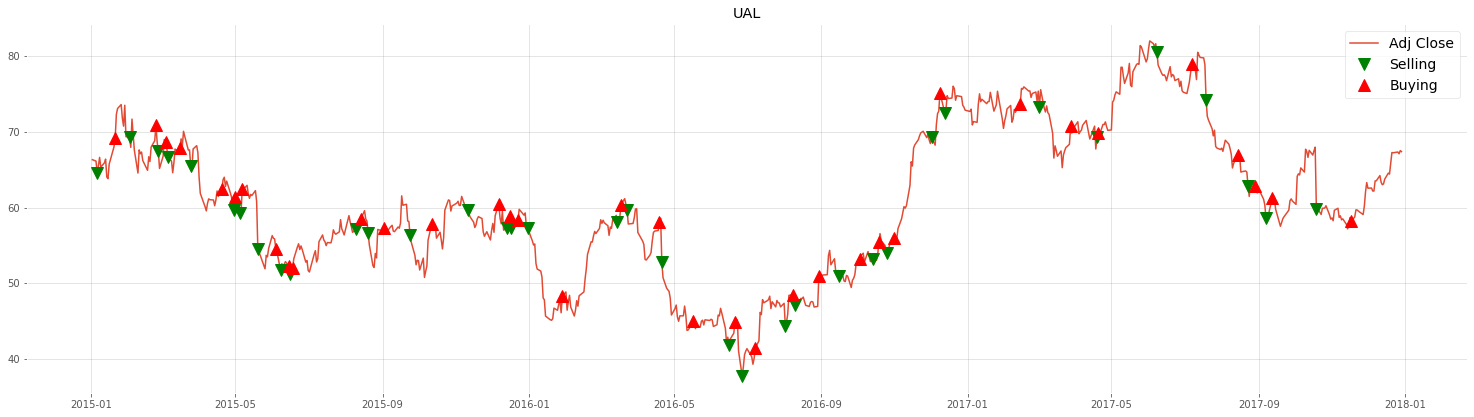

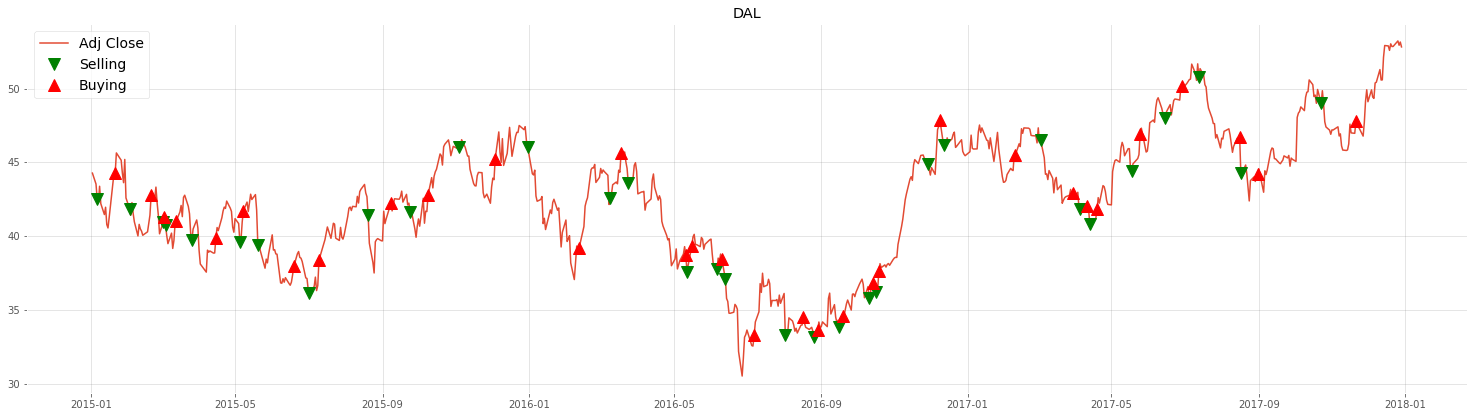

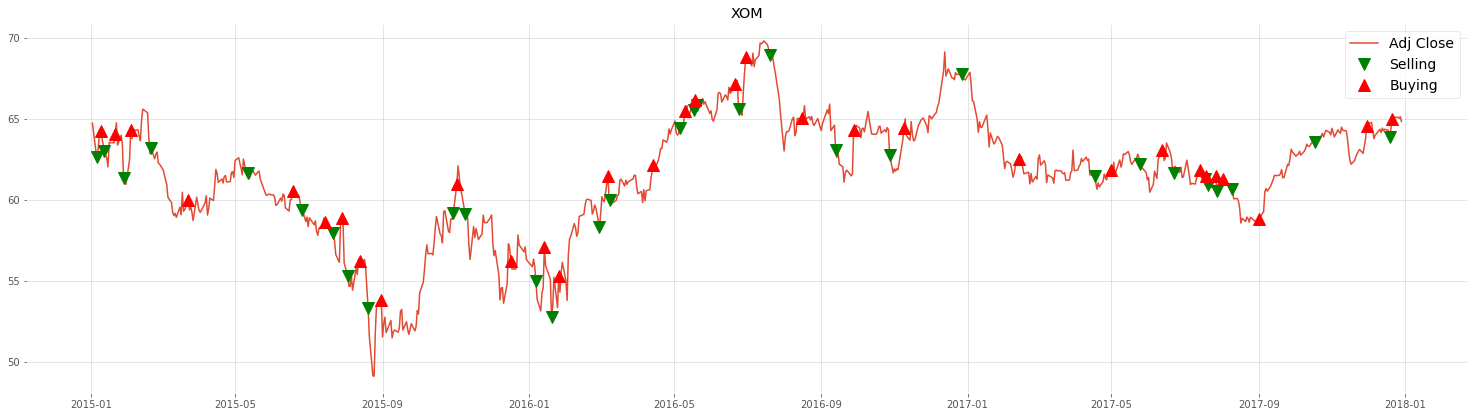

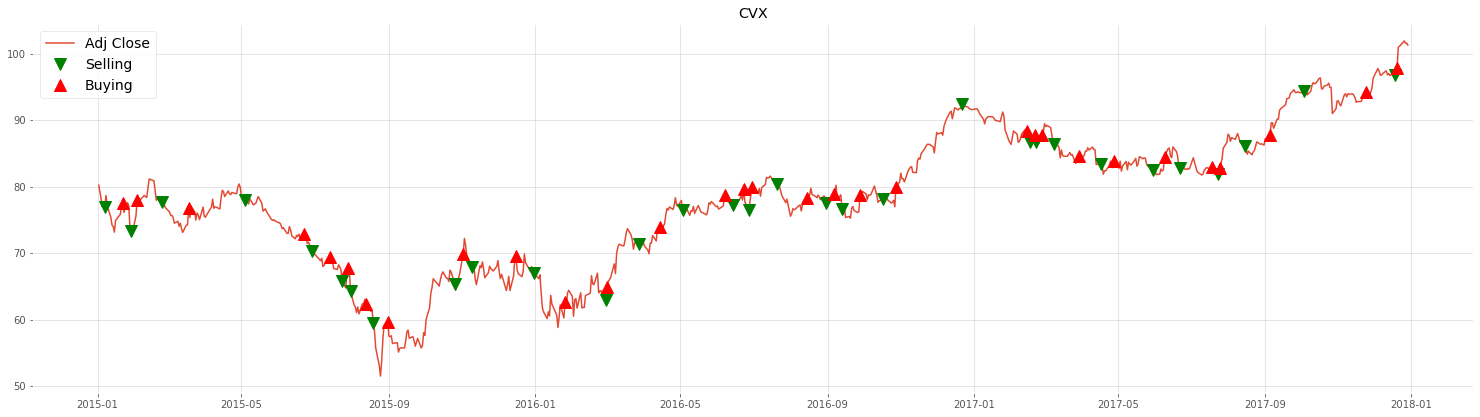

In [23]:

stocks = [  "MSFT",
            "AMZN",
            "UAL",
            "DAL",
            "XOM",
            "CVX", 
         ]
i = 0
for stock in stocks:
    data = obtain([stock],
                      dt.datetime(2014, 11, 3),
                      dt.datetime(2017, 12, 31)
                      )

    data["EWMA_short"] = data[["Adj Close"]].ewm(span = short_window).mean()
    data["EWMA_long"] = data[["Adj Close"]].ewm(span = long_window).mean()
    data["MACD"] = data["EWMA_short"] - data["EWMA_long"]
    data["MACD_signal"] = data[["MACD"]].ewm(span = signal_window).mean()
    data["MACD_hist"] = data["MACD"] - data["MACD_signal"]
    data["positions"] = data["MACD_hist"].apply(lambda x :1 if x>0 else 0)
    data["buy_sell_positions"] = data["positions"].diff()
    data = data.loc['2015-01-02':,:]

    fig = plt.figure()  
    fig.set_size_inches((20, 16))
    ax_close = fig.add_axes((0, 0.12*i, 1, 0.32))   
 
    #close
    ax_close.plot(data.index, data["Adj Close"], label="Adj Close")

    # Selling
    ax_close.plot(data.loc[data.buy_sell_positions == -1.0].index,
             data['Adj Close'][data.buy_sell_positions == -1.0],
             "v",
             markersize = 12,
             color = "green",
            label = 'Selling')

    # Buying
    ax_close.plot(data.loc[data.buy_sell_positions == 1.0].index,
             data['Adj Close'][data.buy_sell_positions == 1.0],
             "^",
             markersize = 12,
             color = "red",
            label = 'Buying')

    ax_close.set_title(f'{stock}')
    ax_close.legend()


plt.show()

###  <font color = blue> 👉 Question 7. </font> Which of the six stocks performs the best, based on cumulative returns?

### Below are the lines of code that lead to an answer:

In [24]:
def back_test_result(data):
    short_window = 12
    long_window = 26
    signal_window = 9

    data["EWMA_short"] = data[["Adj Close"]].ewm(span = short_window).mean()
    data["EWMA_long"] = data[["Adj Close"]].ewm(span = long_window).mean()
    data["MACD"] = data["EWMA_short"] - data["EWMA_long"]
    data["MACD_signal"] = data[["MACD"]].ewm(span = signal_window).mean()
    data["MACD_hist"] = data["MACD"] - data["MACD_signal"]
    data["positions"] = data["MACD_hist"].apply(lambda x :1 if x>0 else 0)
    data["buy_sell_positions"] = data["positions"].diff()
    
    our_capital_list = []
    our_capital = 100000.0
    cash_list = []
    cash = 100000.0
    volume_list = []
    volume = 0
    fee = 5.0
    our_position = pd.DataFrame(index = data.index).fillna(0.0)

    for Date in data.index:
        if data.loc[data.index == Date,"buy_sell_positions"][0] == 1:
            volume = (cash - fee) // data.loc[data.index == Date,"Adj Close"][0] 
            volume_list.append(volume)
            cash = cash - volume * data.loc[data.index == Date,"Adj Close"][0]  - fee
            cash_list.append(cash)
            our_capital = volume * data.loc[data.index == Date,"Adj Close"][0]  + cash
            our_capital_list.append(our_capital)
        elif data.loc[data.index == Date,"buy_sell_positions"][0] == -1:
            cash = cash - fee + volume * data.loc[data.index == Date,"Adj Close"][0] 
            cash_list.append(cash)
            volume = 0
            volume_list.append(volume)
            our_capital = volume * data.loc[data.index == Date,"Adj Close"][0]  + cash
            our_capital_list.append(our_capital)
        else:
            cash_list.append(cash)
            volume_list.append(volume)
            our_capital = volume * data.loc[data.index == Date,"Adj Close"][0]  + cash
            our_capital_list.append(our_capital)
        back_test = pd.concat([pd.DataFrame(data.index,columns = ['Date']),
                               pd.DataFrame(volume_list,columns = ['stock_volume']),
                               pd.DataFrame(cash_list,columns = ['cash']),
                               pd.DataFrame(our_capital_list,columns = ['our_capital'])
                              ],axis = 1)
        back_test['return'] = np.log(back_test['our_capital']/back_test['our_capital'].shift())
        back_test['return_cumsum'] = np.exp(back_test['return'].cumsum())-1
        back_test['max_performance'] = back_test["return_cumsum"].cummax()
        back_test['drawdown'] = back_test['max_performance'] - back_test["return_cumsum"]
        back_test['max_drawdown'] = back_test['drawdown'].cummax()
        back_test.set_index('Date',inplace = True)
    return back_test

In [25]:
def get_profit(stocks):
    Ticker = list()
    Profit = list()
    for i in stocks:
        data = obtain([i],dt.datetime(2015, 1, 2),dt.datetime(2017, 12, 31))
        profit = back_test_result(data)["return_cumsum"].iloc[-1]
        Profit.append(profit)
        Ticker.append(i)
        Return = pd.concat([pd.DataFrame(Ticker,columns = ["Stock"]),
                            pd.DataFrame(Profit,columns = ["Cumulative_Profit"])],axis = 1).sort_values('Cumulative_Profit',ascending = False)
    return Return

In [26]:
get_profit(stocks)


,Stock,Cumulative_Profit
1,AMZN,0.646349
0,MSFT,0.168080
3,DAL,0.139174
5,CVX,0.011523
4,XOM,-0.194868
2,UAL,-0.367995


### <font color = red> Answer 7 </font>

    The answer is AMZN .
    

###  <font color = blue> 👉 Question 8. </font> Which of the stocks displays the worst max drawdown, based on net drawdown % and the number of days?

### Below are the lines of code that lead to an answer:

In [27]:
drawdown_list = []
for i in stocks:
    data = obtain([i],dt.datetime(2015, 1, 2),dt.datetime(2017, 12, 31))
    back_test = back_test_result(data)
    drawdown = max_drawdown(back_test).head(1)
    drawdown['ticker'] = i
    drawdown.reset_index(drop = True,inplace = True)
    drawdown_list.append(drawdown)
drawdown_df =  pd.concat(drawdown_list,axis = 0)

In [28]:
drawdown_df.sort_values(by=['max_drawdown','period'],ascending = False,inplace = True)
drawdown_df

,period,max_drawdown,begin,end,ticker
0,1079 days,0.281525,2015-01-07,2017-12-21,CVX
0,985 days,0.255341,2015-01-22,2017-10-03,DAL
0,111 days,0.147354,2015-01-07,2015-04-28,MSFT
0,32 days,0.143672,2015-09-21,2015-10-23,AMZN
0,15 days,0.039000,2015-01-07,2015-01-22,UAL
0,1 days,0.000000,2015-01-05,2015-01-06,XOM


### <font color = red> Answer 8 </font>

    The answer is CVX .

###  <font color = blue> 👉 Question 9. </font> Looking at each of the six stocks’ annual returns, which year for which stocks shows the best performance?

### Below are the lines of code that lead to an answer:

In [29]:
def get_profit_each_year(stocks):
    Frame = pd.DataFrame()
    for i in stocks:
        data = obtain([i],dt.datetime(2015, 1, 2),dt.datetime(2017, 12, 31))
        back_test = back_test_result(data)
        Annual_return = np.exp(back_test["return"].groupby(back_test.index.year).sum())-1
        profit = pd.DataFrame(Annual_return)
        profit["Ticker"] = i
        Frame = pd.concat([Frame,profit],axis = 0)
    return Frame
        

In [30]:
profit_each_year = get_profit_each_year(stocks)
profit_each_year.sort_values('return',ascending = False,inplace = True)
profit_each_year

,return,Ticker
Date,,
2015,0.755811,AMZN
2017,0.233171,DAL
2015,0.200881,MSFT
2016,0.188756,CVX
2017,0.112301,MSFT
2017,0.068279,CVX
2017,0.060604,AMZN
2016,0.060564,DAL
2017,0.042069,UAL


In [31]:
profit_each_year.head(1)

,return,Ticker
Date,,
2015,0.755811,AMZN


### <font color = red> Answer 9 </font>

    The answer is AMZN 2015.

###  <font color = blue> 👉 Question 10. </font> Which of the six stocks make the current strategy investment performance? Please rank the seven stocks based on their annualized Sharpe ratio.

### Below are the lines of code that lead to an answer:

In [32]:
stocks = [  "MSFT",
            "AMZN",
            "UAL",
            "DAL",
            "XOM",
            "CVX", 
            "AAPL"
         ]

In [33]:
def get_sharp(stocks):
    Frame = pd.DataFrame()
    for i in stocks:
        data = obtain([i],dt.datetime(2015, 1, 2),dt.datetime(2017, 12, 31))
        back_test = back_test_result(data)
        sharp = (np.exp(back_test["return"])-1).mean()/(np.exp(back_test["return"])-1).std()*(252**0.5)
        sharp = pd.DataFrame([sharp],columns = ['sharp_ratio'])
        sharp["Ticker"] = i
        Frame = pd.concat([Frame,sharp],axis = 0)
    return Frame
        

In [34]:
sharp_ratio = get_sharp(stocks)
sharp_ratio.sort_values('sharp_ratio',ascending = False,inplace = True)
sharp_ratio

,sharp_ratio,Ticker
0,1.334925,AAPL
0,0.929955,AMZN
0,0.392320,MSFT
0,0.317261,DAL
0,0.102752,CVX
0,-0.446335,UAL
0,-0.515130,XOM


### <font color = red> Answer 10 </font>

    MSFT 0.392319
    
    AMZN 0.929955

    UAL  -0.446335

    DAL  0.317259

    XOM  -0.515131
    
    CVX  0.102754
    
    AAPL 1.334927	


> 💯 “Thank you for putting your efforts into the individual assessment questions” 😊